# How Not To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute
***
## Looking Around the World – What can Americans Learn?
In this notebook we will explore data from 33 different countries and see how America ranks in terms if sleep.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from matplotlib.lines import Line2D

## Parameters
Here we will load in the files needed in our notebook.<br>
One parameter contains the directory of the clean version of our OECD dataset with more recent years<br>
The other contains the directory to the clean version of our second OECD dataset. This one contains slightly older data but it is needed as some countries in the other OECD dataset are not correct.

In [2]:
TOTAL_OECD_DATASET = '../data_file/cleaned_data_csv/total_oecd_df.csv'
TOTAL_OECD_ARCHIVE_DATASET = '../data_file/cleaned_data_csv/total_oecd_archive_df.csv'

## Load Cleaned Dataset
Our data is in CSV format so we will use the Pandas .read_csv()

In [3]:
total_oecd = pd.read_csv(TOTAL_OECD_DATASET)

In [4]:
display(total_oecd.head())
print(total_oecd.columns.values)
print(f"\ntotal_oecd has {len(total_oecd.columns.values)} columns.\ntotal_oecd shape : {total_oecd.shape}")

,Unnamed: 0,year,paid_work_study,paid_work_(all),work_school_travel,in_school,research/homework,job_serach,other_paid_work_study,unpaid_work,...,leisure,sports,attending_events,meeting_friends,tv_radio,other_leisure_activities,other,religion,other_(no categories),total
0,Australia,2006.0,238.0,186.0,25.0,16.0,11.0,0.0,0.0,243.0,...,281.0,19.0,6.0,40.0,140.0,76.0,20.0,13.0,7.0,1440.0
1,Austria,2008.0,306.0,248.0,29.0,26.0,1.0,1.0,1.0,202.0,...,291.0,32.0,9.0,82.0,109.0,59.0,8.0,3.0,5.0,1440.0
2,Belgium,2013.0,236.0,168.0,26.0,27.0,15.0,0.0,0.0,192.0,...,339.0,21.0,15.0,50.0,131.0,122.0,9.0,3.0,7.0,1440.0
3,Canada,2015.0,305.0,238.0,29.0,21.0,15.0,2.0,0.0,186.0,...,279.0,21.0,6.0,53.0,109.0,89.0,34.0,4.0,30.0,1440.0
4,Denmark,2001.0,225.0,177.0,23.0,16.0,9.0,0.0,0.0,217.0,...,329.0,22.0,7.0,81.0,123.0,95.0,10.0,6.0,4.0,1440.0


['Unnamed: 0' 'year' 'paid_work_study' 'paid_work_(all)'
 'work_school_travel' 'in_school' 'research/homework' 'job_serach'
 'other_paid_work_study' 'unpaid_work' 'routine_housework' 'shopping'
 'care_for_household_members' 'child_care' 'adult_care'
 'care_for_non_household_members' 'volunteering'
 'household_activity_travel' 'other_unpaid' 'personal_care' 'sleeping'
 'eating_drinking' 'personal_care_travel' 'leisure' 'sports'
 'attending_events' 'meeting_friends' 'tv_radio'
 'other_leisure_activities' 'other' 'religion' 'other_(no categories)'
 'total']

total_oecd has 33 columns.
total_oecd shape : (33, 33)


We can see that the column containing the countries is unnamed. This needs to be fixed.

In [5]:
total_oecd.rename(columns = {'Unnamed: 0':'country'}, inplace = True)
total_oecd.head()

,country,year,paid_work_study,paid_work_(all),work_school_travel,in_school,research/homework,job_serach,other_paid_work_study,unpaid_work,...,leisure,sports,attending_events,meeting_friends,tv_radio,other_leisure_activities,other,religion,other_(no categories),total
0,Australia,2006.0,238.0,186.0,25.0,16.0,11.0,0.0,0.0,243.0,...,281.0,19.0,6.0,40.0,140.0,76.0,20.0,13.0,7.0,1440.0
1,Austria,2008.0,306.0,248.0,29.0,26.0,1.0,1.0,1.0,202.0,...,291.0,32.0,9.0,82.0,109.0,59.0,8.0,3.0,5.0,1440.0
2,Belgium,2013.0,236.0,168.0,26.0,27.0,15.0,0.0,0.0,192.0,...,339.0,21.0,15.0,50.0,131.0,122.0,9.0,3.0,7.0,1440.0
3,Canada,2015.0,305.0,238.0,29.0,21.0,15.0,2.0,0.0,186.0,...,279.0,21.0,6.0,53.0,109.0,89.0,34.0,4.0,30.0,1440.0
4,Denmark,2001.0,225.0,177.0,23.0,16.0,9.0,0.0,0.0,217.0,...,329.0,22.0,7.0,81.0,123.0,95.0,10.0,6.0,4.0,1440.0


The overarching column ["Personal Care"] contains sleep. We want to have sleep on its own while also having a column for personal care.<br>
The column ["Other Personal Care"] will contain time spent travelling and time spent eating and drinking.

In [6]:
total_oecd['other_personal_care'] = total_oecd[['personal_care_travel', 'eating_drinking']].sum(axis=1)

Our main priority is sleep in this analysis so we would like to sort our datafram by the amount of time spent sleeping.

In [7]:
total_oecd_sorted = total_oecd.sort_values(by=['sleeping'], ascending=True)
total_oecd_sorted.head()

,country,year,paid_work_study,paid_work_(all),work_school_travel,in_school,research/homework,job_serach,other_paid_work_study,unpaid_work,...,sports,attending_events,meeting_friends,tv_radio,other_leisure_activities,other,religion,other_(no categories),total,other_personal_care
13,Japan,2016.0,363.0,282.0,43.0,37.0,0.0,0.0,0.0,132.0,...,10.0,0.0,17.0,103.0,148.0,47.0,0.0,47.0,1440.0,178.0
14,Korea,2014.0,344.0,231.0,57.0,37.0,20.0,0.0,0.0,132.0,...,27.0,4.0,42.0,102.0,82.0,28.0,9.0,18.0,1440.0,207.0
26,Sweden,2010.0,293.0,231.0,31.0,31.0,0.0,0.0,0.0,196.0,...,34.0,9.0,53.0,113.0,112.0,6.0,0.0,0.0,1440.0,140.0
4,Denmark,2001.0,225.0,177.0,23.0,16.0,9.0,0.0,0.0,217.0,...,22.0,7.0,81.0,123.0,95.0,10.0,6.0,4.0,1440.0,171.0
11,Ireland,2005.0,268.0,208.0,23.0,37.0,0.0,0.0,0.0,210.0,...,20.0,42.0,49.0,85.0,116.0,41.0,6.0,35.0,1440.0,117.0


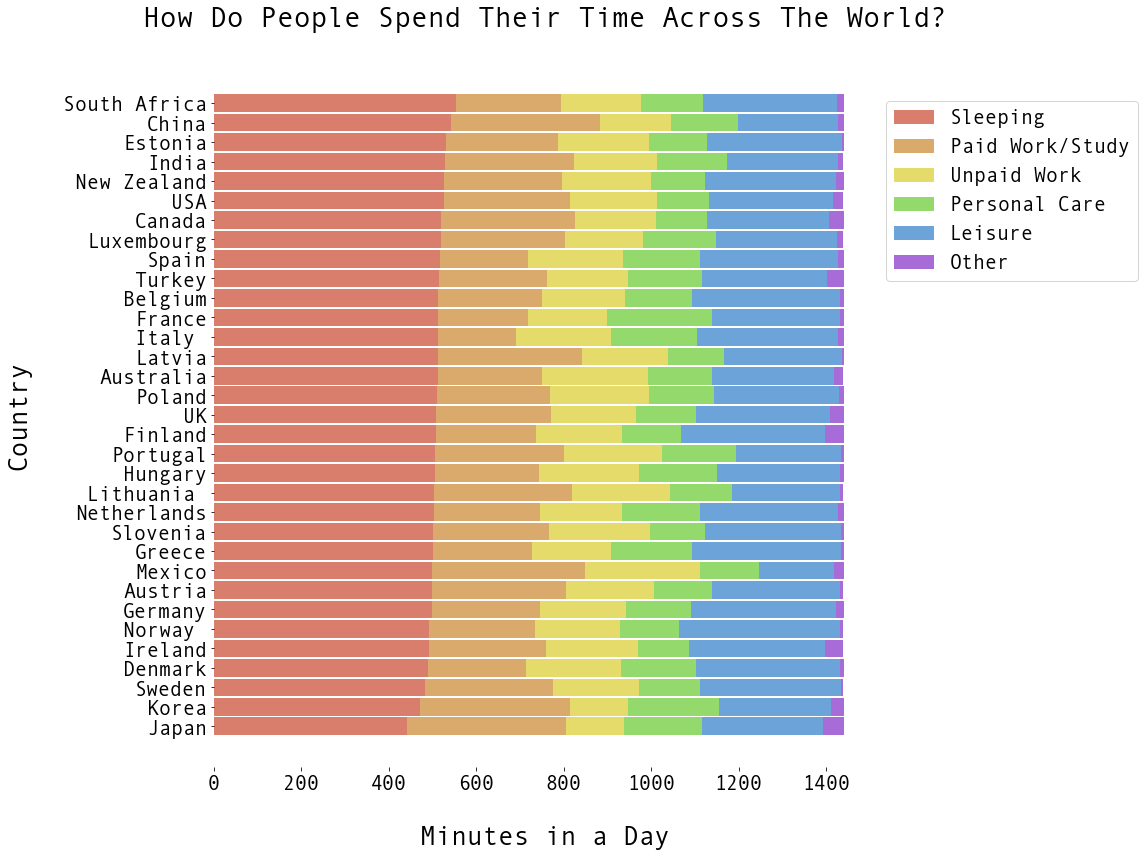

In [8]:
def daily_time_use(df):  
    
    #columsn we will be using
    fields = ['sleeping',
              'paid_work_study',
              'unpaid_work',
              'other_personal_care',
              'leisure',
              'other']

    colors = ['#d97e6c', '#d9aa6c', 
              '#E5DB6B', '#94d96c', 
              '#6ca4d9','#a86cd9']

    labels = [
              'Sleeping',
              'Paid Work/Study',
              'Unpaid Work',
              'Personal Care',
              'Leisure',
              'Other']


    fig, ax = plt.subplots(1, figsize=(16, 12))
    left = len(df) * [0]

    for idx, name in enumerate(fields):
        
        #plot stacked horizontal bar charts for each column
        plt.barh(df['country'],
                 df[name],
                 left = left, #base of this bar chart is the end of the previous bar
                 color=colors[idx],
                 height =0.9) 
        
        left = left + df[name]

        
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
        
        
    ax.set_title('How Do People Spend Their Time Across The World?\n', fontsize=28,fontfamily = 'Andale Mono')

    ax.set_xlabel('\nMinutes in a Day',fontsize=26, fontfamily = 'Andale Mono')
    ax.xaxis.set_tick_params(labelsize=20)
    plt.xticks(fontname = 'Andale Mono') 


    ax.set_ylabel('Country\n', fontsize=26,fontfamily = 'Andale Mono')
    ax.yaxis.set_tick_params(labelsize=20)
    plt.yticks(fontname = 'Andale Mono')

    ax.legend(labels, bbox_to_anchor=([1, 0.96, 0, 0]), ncol=1,prop={'size': 20,'family':'Andale Mono'})


    plt.tight_layout()

    plt.savefig('../data_file/graphs/PNG/1003_how_time_is_spent.png', dpi=300)
    plt.savefig('../data_file/graphs/JPG/1003_how_time_is_spent.jpg', dpi=300)

        
daily_time_use(total_oecd_sorted)

### How do The Top 3 Sleeping Countries Spend Their Time
First we want to find out which 3 countries sleep the most

In [9]:
total_oecd_sorted.sort_values(by=['sleeping'], ascending=False).head(3)

,country,year,paid_work_study,paid_work_(all),work_school_travel,in_school,research/homework,job_serach,other_paid_work_study,unpaid_work,...,sports,attending_events,meeting_friends,tv_radio,other_leisure_activities,other,religion,other_(no categories),total,other_personal_care
32,South Africa,2010.0,241.0,153.0,36.0,26.0,13.0,0.0,13.0,182.0,...,5.0,5.0,82.0,132.0,82.0,16.0,16.0,0.0,1440.0,142.0
30,China,2008.0,340.0,268.0,47.0,25.0,0.0,0.0,0.0,164.0,...,23.0,2.0,23.0,127.0,53.0,15.0,0.0,15.0,1440.0,152.0
5,Estonia,2009.0,256.0,201.0,29.0,24.0,1.0,0.0,0.0,208.0,...,27.0,8.0,38.0,122.0,114.0,5.0,1.0,4.0,1440.0,133.0


As we can see South Africa, China and Estonia sleep the most. And so those countries will be our main focus for this part.

In [10]:
#we don't want to alter the total_oecd_sorted df so we will make a copy called total_oecd_sorted_copy to work with
total_oecd_sorted_copy = total_oecd_sorted.copy() 
total_oecd_sorted_copy.columns

Index(['country', 'year', 'paid_work_study', 'paid_work_(all)',
       'work_school_travel', 'in_school', 'research/homework', 'job_serach',
       'other_paid_work_study', 'unpaid_work', 'routine_housework', 'shopping',
       'care_for_household_members', 'child_care', 'adult_care',
       'care_for_non_household_members', 'volunteering',
       'household_activity_travel', 'other_unpaid', 'personal_care',
       'sleeping', 'eating_drinking', 'personal_care_travel', 'leisure',
       'sports', 'attending_events', 'meeting_friends', 'tv_radio',
       'other_leisure_activities', 'other', 'religion',
       'other_(no categories)', 'total', 'other_personal_care'],
      dtype='object')

In [11]:
#we want to rename some of our columns so that they appear better in our graphs
total_oecd_sorted_copy.rename(columns = {'paid_work_study': 'Paid Work Study',
                                         'unpaid_work': 'Unpaid Work',
                                         'sleeping' : 'Sleeping',
                                         'other_personal_care': 'Personal Care',
                                         'leisure': 'Leisure',
                                         'other': 'Other'}, inplace = True)

sleeping_top1 = total_oecd_sorted_copy.sort_values('Sleeping').tail(1)
sleeping_top1


,country,year,Paid Work Study,paid_work_(all),work_school_travel,in_school,research/homework,job_serach,other_paid_work_study,Unpaid Work,...,sports,attending_events,meeting_friends,tv_radio,other_leisure_activities,Other,religion,other_(no categories),total,Personal Care
32,South Africa,2010.0,241.0,153.0,36.0,26.0,13.0,0.0,13.0,182.0,...,5.0,5.0,82.0,132.0,82.0,16.0,16.0,0.0,1440.0,142.0


### How do Different Countries Use their Time and What Can America Learn?

In [12]:
#we will be focusing on these particular categories
focused_categories = ['Sleeping',
                      'Paid Work Study',
                      'Unpaid Work',
                      'Personal Care',
                      'Leisure',
                      'Other']

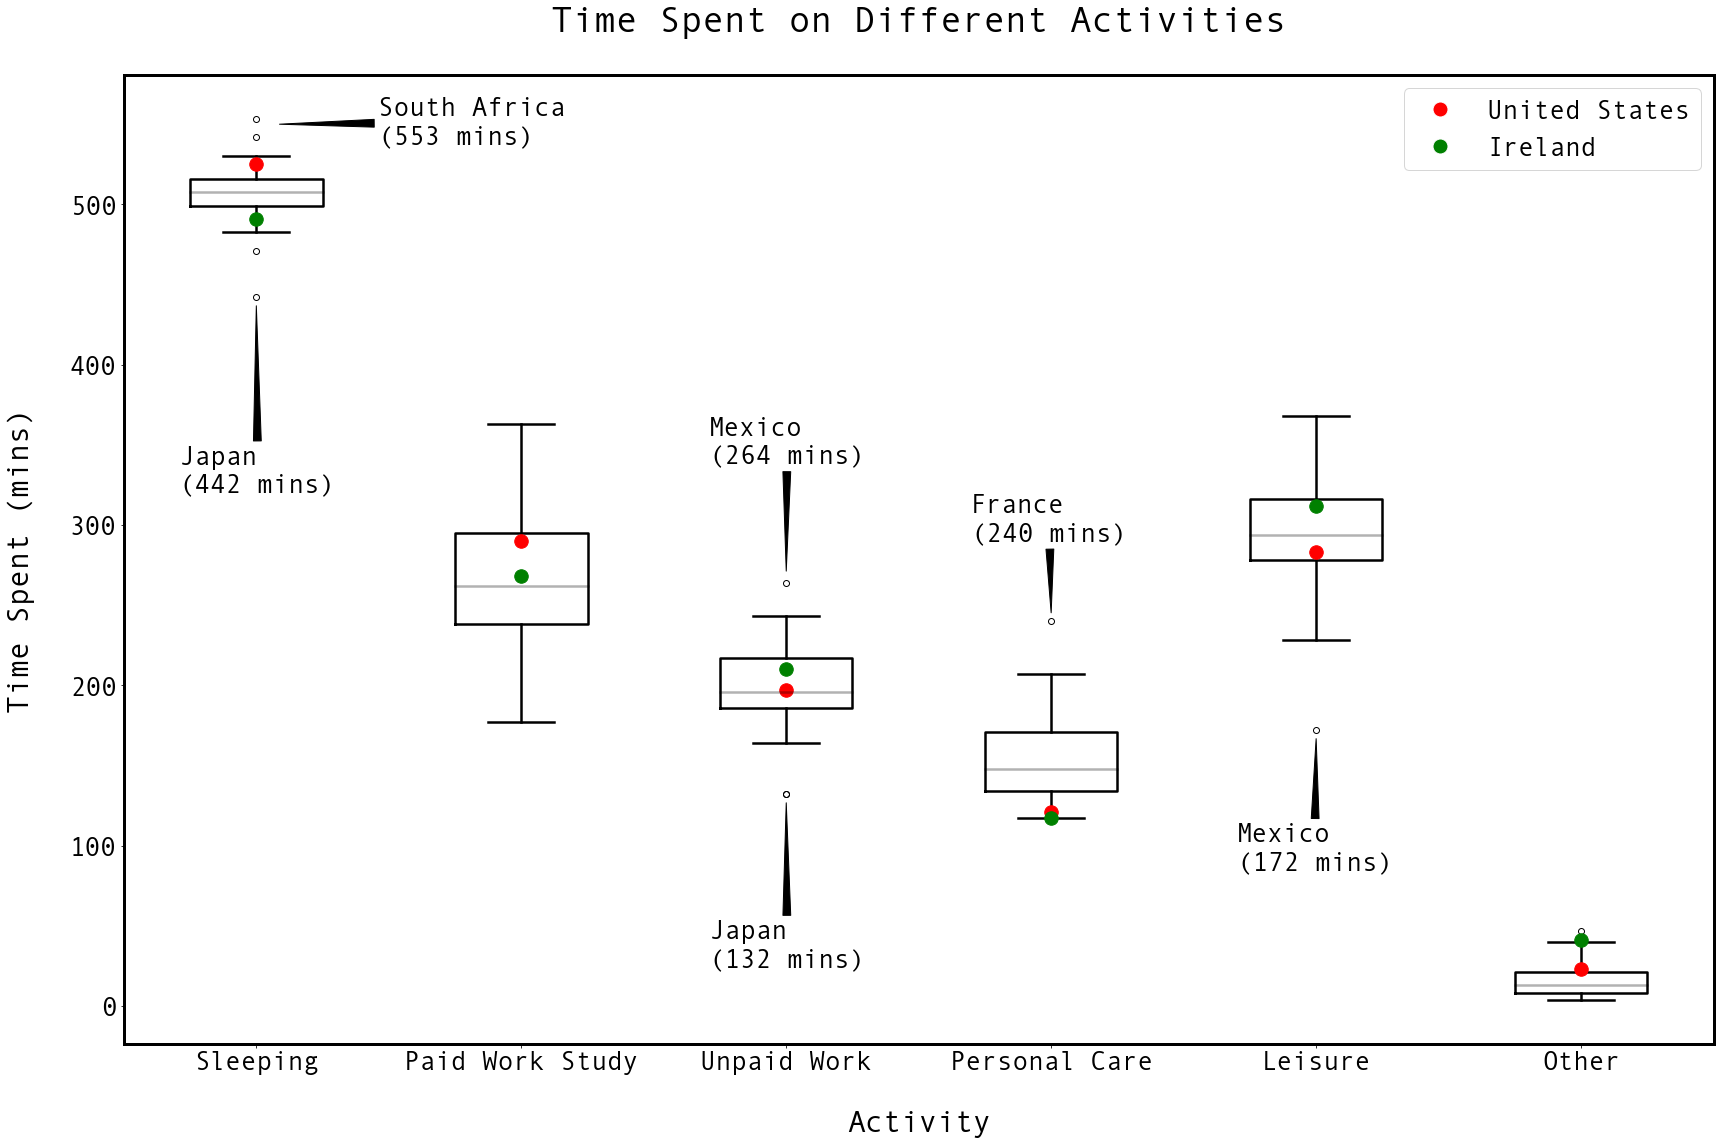

In [13]:
boxprops = dict(linewidth=2.5)
medianprops = dict(linewidth=2.5,color = 'black',alpha = .3)
capprops=dict(linewidth=2.5) 
whiskerprops=dict(linewidth=2.5)

fig, ax= plt.subplots(figsize=(24,16))
ax = total_oecd_sorted_copy.boxplot(column = ['Sleeping',
                                              'Paid Work Study',
                                              'Unpaid Work',
                                              'Personal Care',
                                              'Leisure',
                                              'Other'],
                                    color ='black',
                                    medianprops = medianprops,# middle line
                                    boxprops=boxprops, #main box
                                    capprops=capprops,  #caps
                                    whiskerprops=whiskerprops)

i=1
for category in focused_categories:
    
    ax.plot(i,total_oecd_sorted_copy.loc[29][category], marker="o", color="red", markersize=13.5) #America
    ax.plot(i,total_oecd_sorted_copy.loc[11][category], marker="o", color="green", markersize=13.5)#Ireland
    
    i+=1
    
ax.set_xlabel('\nActivity', fontsize=30, fontfamily = 'Andale Mono')
ax.set_ylabel('Time Spent (mins)\n', fontsize=30, fontfamily = 'Andale Mono')
ax.grid(False)

legend_elements = [Line2D([0],
                          [0], 
                          marker='o',
                          color='w',
                          label='United States',
                          markerfacecolor='r', 
                          markersize=15),
                   
                   
                   Line2D([0],
                          [0], 
                          marker='o', 
                          color='w', 
                          label='Ireland',
                          markerfacecolor='g', 
                          markersize=15)]

ax.legend(handles = legend_elements, loc='upper right',prop={'size': 26,'family':'Andale Mono'})

plt.title('Time Spent on Different Activities\n', fontsize=36, fontfamily = 'Andale Mono')

ax.xaxis.set_tick_params(labelsize=26)
plt.xticks(fontfamily = 'Andale Mono')

ax.yaxis.set_tick_params(labelsize=26)
plt.yticks(fontfamily = 'Andale Mono')

#remove spines
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)


#Label Outliers
ax.annotate(
    'Japan\n(442 mins)',
    (1, 438),#move point 
    xytext=(0.035,0.57), #move word
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=26,
    fontfamily = 'Andale Mono')

ax.annotate(
    'South Africa\n(553 mins)',
    (1.08, 550),#move point 
    xytext=(0.16,0.93), #move word
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=26,
    fontfamily = 'Andale Mono')

ax.annotate(
    'Japan\n(132 mins)',
    (3, 128),#move point 
    xytext=(0.368,0.08), #move word
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=26,
    fontfamily = 'Andale Mono')

ax.annotate(
    'Mexico\n(264 mins)',
    (3, 270),#move point 
    xytext=(0.368,0.6), #move word
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=26,
    fontfamily = 'Andale Mono')


ax.annotate(
    'France\n(240 mins)',
    (4, 244),#move point 
    xytext=(0.533,0.52), #move word
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=26,
    fontfamily = 'Andale Mono')


ax.annotate(
    'Mexico\n(172 mins)',
    (5, 168),#move point 
    xytext=(0.7,0.18), #move word
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=26,
    fontfamily = 'Andale Mono')


plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/1003_5_activities_world_box_plot.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/1003_5_activities_world_box_plot.jpg', dpi=300)


In [14]:
top3_sleeping_countries = total_oecd_sorted.sort_values(by=['sleeping'], ascending=False).head(3)

top3_sleeping_countries = top3_sleeping_countries.set_index('country')

top3_sleeping_countries=top3_sleeping_countries.drop([ 'year',
                                                      'paid_work_(all)',
                                                      'work_school_travel', 
                                                      'in_school','research/homework', 'job_serach',
                                                      'other_paid_work_study',
                                                      'routine_housework', 'shopping',
                                                      'care_for_household_members',
                                                      'child_care', 'adult_care',
                                                      'care_for_non_household_members',
                                                      'volunteering',
                                                      'household_activity_travel',
                                                      'other_unpaid', 'personal_care',
                                                      'eating_drinking',
                                                      'personal_care_travel',
                                                      'sports', 'attending_events',
                                                      'meeting_friends', 'tv_radio',
                                                      'other_leisure_activities',
                                                      'religion',
                                                      'other_(no categories)',
                                                      'total'], axis = 1)

top3_sleeping_countries

,paid_work_study,unpaid_work,sleeping,leisure,other,other_personal_care
country,,,,,,
South Africa,241.0,182.0,553.0,306.0,16.0,142.0
China,340.0,164.0,542.0,228.0,15.0,152.0
Estonia,256.0,208.0,530.0,309.0,5.0,133.0


Now that we have our top sleeping countries we want individual dataframes for them.

In [15]:
#South Africa
top1=top3_sleeping_countries.iloc[[0]].T.sort_values('South Africa',ascending = True).T
display(top1)

#China
top2=top3_sleeping_countries.iloc[[1]].T.sort_values('China',ascending = True).T
display(top2)

#Estonia
top3=top3_sleeping_countries.iloc[[2]].T.sort_values('Estonia',ascending = True).T
display(top3)

,other,other_personal_care,unpaid_work,paid_work_study,leisure,sleeping
country,,,,,,
South Africa,16.0,142.0,182.0,241.0,306.0,553.0


,other,other_personal_care,unpaid_work,leisure,paid_work_study,sleeping
country,,,,,,
China,15.0,152.0,164.0,228.0,340.0,542.0


,other,other_personal_care,unpaid_work,paid_work_study,leisure,sleeping
country,,,,,,
Estonia,5.0,133.0,208.0,256.0,309.0,530.0


In [16]:
dfs = [top1,top2,top3]

def category_time_spent_calc(df,category):
    time = df[category][0]
    time_spent_category = (time/1440)*100

    return(time_spent_category)


def category_time_remaining_calc(df,category):
    time = df[category][0]
    time_remaining_category = ((1440-time)/1440)*100

    return(time_remaining_category)

for df in dfs:
    for column in df.columns:
        category_time_spent_calc(df,column)
    
    for column in df.columns:
        category_time_remaining_calc(df,column)


# Graph for TOP 3 Sleeping Countries

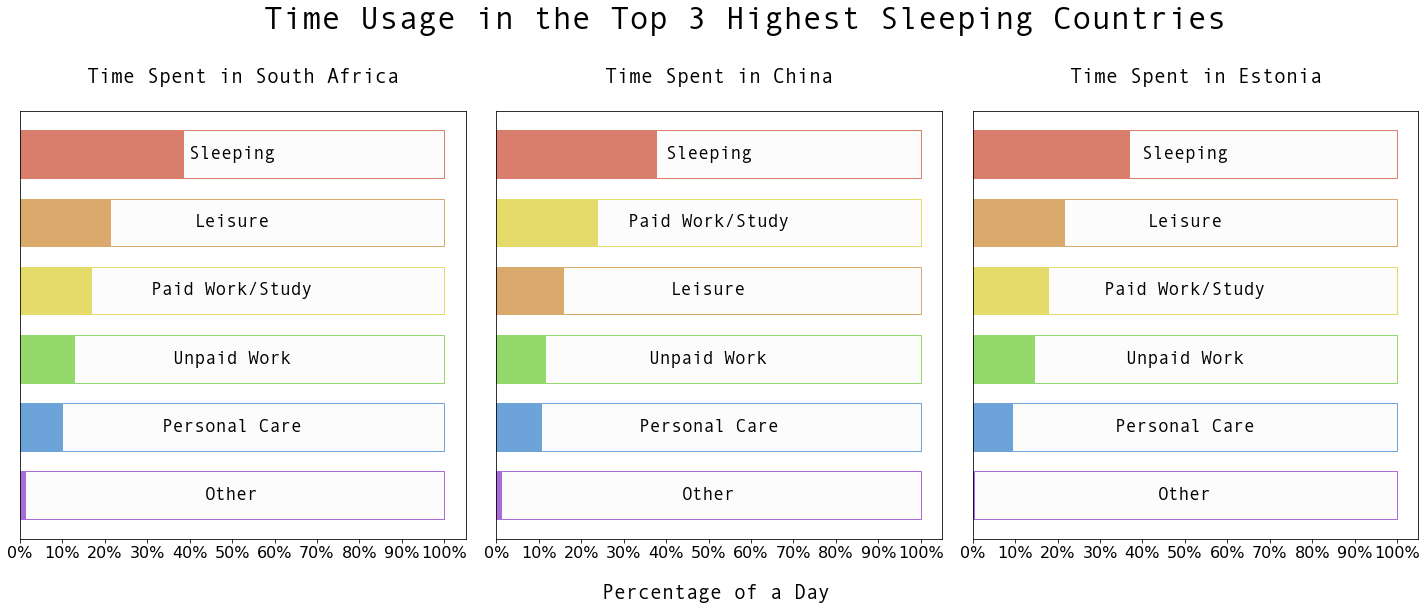

In [17]:
#set labels for bottom sleeping countris using index of dfs
labels1 =top1.T.index 
labels2 =top2.T.index
labels3 =top3.T.index

#create stacked bar charts for time spend and remaining free time for bottom 3 counties
time_spent_1 = [category_time_spent_calc(top1,column) for column in top1.columns] 
free_time_1 = [category_time_remaining_calc(top1,column) for column in top1.columns]

time_spent_2 = [category_time_spent_calc(top2,column) for column in top2.columns] 
free_time_2 = [category_time_remaining_calc(top2,column) for column in top2.columns] 

time_spent_3 = [category_time_spent_calc(top3,column) for column in top3.columns]
free_time_3 = [category_time_remaining_calc(top3,column) for column in top3.columns]

width = .7   

fig, (ax, bx,cx) = plt.subplots(figsize=(20, 8), ncols=3, sharex=True)

#different colors for countries depending on their order
colors1 = ['#a86cd9', '#6ca4d9', 
          '#94d96c', '#E5DB6B', 
          '#d9aa6c','#d97e6c']

colors2 = ['#a86cd9', '#6ca4d9', 
          '#94d96c', '#d9aa6c', 
          '#E5DB6B','#d97e6c']

colors3 = ['#a86cd9', '#6ca4d9', 
          '#94d96c', '#E5DB6B', 
          '#d9aa6c','#d97e6c']


ax.set_title('\nTime Spent in South Africa\n',fontsize = 20,fontfamily = 'Andale Mono')
ax.barh(labels1, time_spent_1, width, label=labels1,color=colors1,edgecolor=colors1)
ax.barh(labels1, free_time_1, width, left=time_spent_1,color='#fcfcfc',edgecolor=colors1)

bx.set_title('\nTime Spent in China\n',fontsize = 20,fontfamily = 'Andale Mono')
bx.barh(labels2, time_spent_2, width, label=labels2,color=colors2,edgecolor=colors2)
bx.barh(labels2, free_time_2, width, left=time_spent_2,color='#fcfcfc',edgecolor=colors2)

cx.set_title('\nTime Spent in Estonia\n',fontsize = 20,fontfamily = 'Andale Mono')
cx.barh(labels3, time_spent_3, width, label=labels3,color=colors3,edgecolor=colors3)
cx.barh(labels3, free_time_3, width, left=time_spent_3,color='#fcfcfc',edgecolor=colors3)



ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(np.arange(0, 100+1, 10)) 

ax.xaxis.set_tick_params(labelsize=16)
bx.xaxis.set_tick_params(labelsize=16)
cx.xaxis.set_tick_params(labelsize=16)


relabels1 = ['Other',
            'Personal Care',
            'Unpaid Work',
            'Paid Work/Study',
            'Leisure',
            'Sleeping']

relabels2 = ['Other',
            'Personal Care',
            'Unpaid Work',
            'Leisure',
            'Paid Work/Study',
            'Sleeping']

relabels3 = ['Other',
            'Personal Care',
            'Unpaid Work',
            'Paid Work/Study',
            'Leisure',
            'Sleeping']

relabels = [relabels1,relabels2,relabels3]
axes = [ax,bx,cx]

for axis,label in zip(axes,relabels):
    for bar,label in zip( axis.patches[:6:],label):
        
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        
        label_text = label
        label_x = x + 50
        label_y = y + height / 2

        axis.text(label_x, label_y, label_text, ha='center', va='center',fontsize =18,fontweight = 'light',fontfamily = 'Andale Mono')    
    axis.axes.yaxis.set_visible(False)

fig.suptitle('   Time Usage in the Top 3 Highest Sleeping Countries',fontsize = 32,fontfamily = 'Andale Mono') 


# Set common labels
fig.text(0.5, 0, '\n\nPercentage of a Day', ha='center', va='center',fontsize = 20,fontfamily = 'Andale Mono')

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/1003_top3_highest_sleep.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/1003_top3_highest_sleep.jpg', dpi=300)

In [18]:
bottom3_sleeping_countries = total_oecd_sorted.sort_values(by=['sleeping'], ascending=False).tail(3)

bottom3_sleeping_countries = bottom3_sleeping_countries.set_index('country')
bottom3_sleeping_countries=bottom3_sleeping_countries.drop([ 'year',
                                                      'paid_work_(all)',
                                                      'work_school_travel', 
                                                      'in_school','research/homework', 'job_serach',
                                                      'other_paid_work_study',
                                                      'routine_housework', 'shopping',
                                                      'care_for_household_members',
                                                      'child_care', 'adult_care',
                                                      'care_for_non_household_members',
                                                      'volunteering',
                                                      'household_activity_travel',
                                                      'other_unpaid', 'personal_care',
                                                      'eating_drinking',
                                                      'personal_care_travel',
                                                      'sports', 'attending_events',
                                                      'meeting_friends', 'tv_radio',
                                                      'other_leisure_activities',
                                                      'religion',
                                                      'other_(no categories)',
                                                      'total'], axis = 1)

bottom3_sleeping_countries

,paid_work_study,unpaid_work,sleeping,leisure,other,other_personal_care
country,,,,,,
Sweden,293.0,196.0,483.0,321.0,6.0,140.0
Korea,344.0,132.0,471.0,258.0,28.0,207.0
Japan,363.0,132.0,442.0,278.0,47.0,178.0


In [19]:
#Sweden
bottom1=bottom3_sleeping_countries.iloc[[0]].T.sort_values('Sweden',ascending = True).T
display(bottom1)

#Korea
bottom2=bottom3_sleeping_countries.iloc[[1]].T.sort_values('Korea',ascending = True).T
display(bottom2)

#Japan
bottom3=bottom3_sleeping_countries.iloc[[2]].T.sort_values('Japan',ascending = True).T
display(bottom3)

,other,other_personal_care,unpaid_work,paid_work_study,leisure,sleeping
country,,,,,,
Sweden,6.0,140.0,196.0,293.0,321.0,483.0


,other,unpaid_work,other_personal_care,leisure,paid_work_study,sleeping
country,,,,,,
Korea,28.0,132.0,207.0,258.0,344.0,471.0


,other,unpaid_work,other_personal_care,leisure,paid_work_study,sleeping
country,,,,,,
Japan,47.0,132.0,178.0,278.0,363.0,442.0


In [20]:
dfs = [bottom1,bottom2,bottom3]

def category_time_spent_calc(df,category):
    time = df[category][0]
    time_spent_category = (time/1440)*100

    return(time_spent_category)


def category_time_remaining_calc(df,category):
    time = df[category][0]
    time_remaining_category = ((1440-time)/1440)*100

    return(time_remaining_category)

for df in dfs:
    for column in df.columns:
        category_time_spent_calc(df,column)
    
    for column in df.columns:
        category_time_remaining_calc(df,column)

# Graph for BOTTOM 3 Sleeping Countries

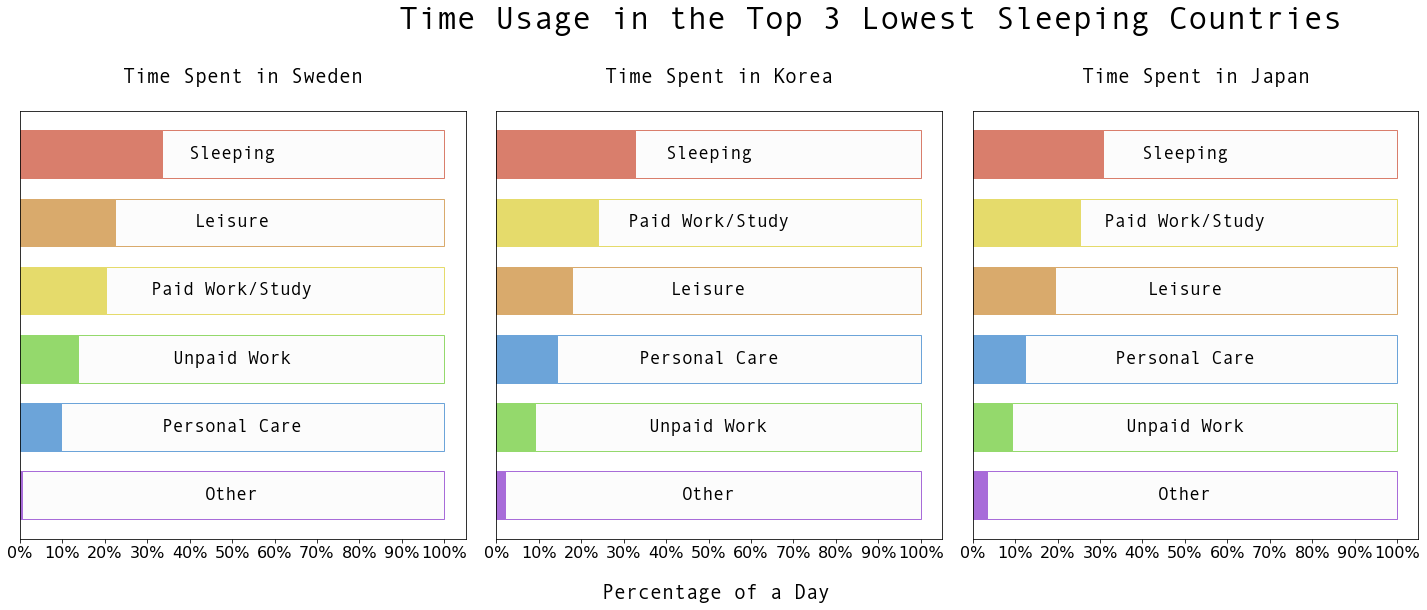

In [21]:
#set labels for bottom sleeping countris using index of dfs
labels1 =bottom1.T.index 
labels2 =bottom2.T.index
labels3 =bottom3.T.index

#create stacked bar charts for time spend and remaining free time for bottom 3 counties
time_spent_1 = [category_time_spent_calc(bottom1,column) for column in bottom1.columns] 
free_time_1 = [category_time_remaining_calc(bottom1,column) for column in bottom1.columns]

time_spent_2 = [category_time_spent_calc(bottom2,column) for column in bottom2.columns] 
free_time_2 = [category_time_remaining_calc(bottom2,column) for column in bottom2.columns] 

time_spent_3 = [category_time_spent_calc(bottom3,column) for column in bottom3.columns]
free_time_3 = [category_time_remaining_calc(bottom3,column) for column in bottom3.columns]

width = .7   

fig, (ax, bx,cx) = plt.subplots(figsize=(20, 8), ncols=3, sharex=True)

#different colors for countries depending on their order
colors1 = ['#a86cd9', '#6ca4d9', 
          '#94d96c', '#E5DB6B', 
          '#d9aa6c','#d97e6c']

colors2 = ['#a86cd9', '#94d96c', 
          '#6ca4d9', '#d9aa6c', 
          '#E5DB6B','#d97e6c']

colors3 = ['#a86cd9', '#94d96c', 
          '#6ca4d9', '#d9aa6c', 
          '#E5DB6B','#d97e6c']


ax.set_title('\nTime Spent in Sweden\n',fontsize = 20,fontfamily = 'Andale Mono')
ax.barh(labels1, time_spent_1, width, label=labels1,color=colors1,edgecolor=colors1)
ax.barh(labels1, free_time_1, width, left=time_spent_1,color='#fcfcfc',edgecolor=colors1)

bx.set_title('\nTime Spent in Korea\n',fontsize = 20,fontfamily = 'Andale Mono')
bx.barh(labels2, time_spent_2, width, label=labels2,color=colors2,edgecolor=colors2)
bx.barh(labels2, free_time_2, width, left=time_spent_2,color='#fcfcfc',edgecolor=colors2)

cx.set_title('\nTime Spent in Japan\n',fontsize = 20,fontfamily = 'Andale Mono')
cx.barh(labels3, time_spent_3, width, label=labels3,color=colors3,edgecolor=colors3)
cx.barh(labels3, free_time_3, width, left=time_spent_3,color='#fcfcfc',edgecolor=colors3)


ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(np.arange(0, 100+1, 10)) 

ax.xaxis.set_tick_params(labelsize=16)
bx.xaxis.set_tick_params(labelsize=16)
cx.xaxis.set_tick_params(labelsize=16)


relabels1 = ['Other',
            'Personal Care',
            'Unpaid Work',
            'Paid Work/Study',
            'Leisure',
            'Sleeping']

relabels2 = ['Other',
            'Unpaid Work',
            'Personal Care',
            'Leisure',
            'Paid Work/Study',
            'Sleeping']

relabels3 = ['Other',
            'Unpaid Work',
            'Personal Care',
            'Leisure',
            'Paid Work/Study',
            'Sleeping']

relabels = [relabels1,relabels2,relabels3]
axes = [ax,bx,cx]

for axis,label in zip(axes,relabels):
    for bar,label in zip( axis.patches[:6:],label):
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        
        label_text = label
        label_x = x + 50
        label_y = y + height / 2

        axis.text(label_x, label_y, label_text, ha='center', va='center',fontsize =18,fontweight = 'light',fontfamily = 'Andale Mono') 
    axis.axes.yaxis.set_visible(False)
    

fig.suptitle('                Time Usage in the Top 3 Lowest Sleeping Countries',fontsize = 32,fontfamily = 'Andale Mono') 

fig.text(0.5, 0, '\n\nPercentage of a Day', ha='center', va='center',fontsize = 20,fontfamily = 'Andale Mono')

fig.tight_layout()

plt.savefig('../data_file/graphs/PNG/1003_bottom3_highest_sleep.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/1003_bottom3_highest_sleep.jpg', dpi=300)
